In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.graph_objs as go
# Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
from wordcloud import WordCloud
from matplotlib import colors 

In [2]:
data = pd.read_csv('alldata.csv')

In [3]:
data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [5]:
data.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [17]:
data.reviews

0           NaN
1           NaN
2           NaN
3          44.0
4         550.0
         ...   
6959      574.0
6960       26.0
6961        5.0
6962     4618.0
6963    11610.0
Name: reviews, Length: 6964, dtype: float64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

position       0
company        0
description    0
reviews        0
location       0
dtype: int64

<AxesSubplot:>

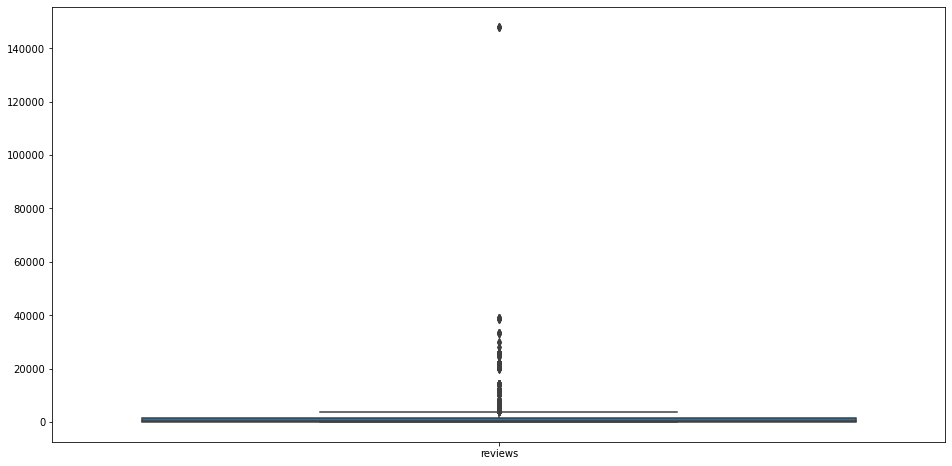

In [8]:
plt.figure(figsize=(16,8))
sns.boxplot(data = data )

In [11]:
data.describe()
# there is very big diffrent between mean and median 

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [21]:
data['position'].nunique()

4221

In [38]:
data1 = data.position.value_counts().head(10).sort_values(ascending=False).reset_index()

In [39]:
data1

,index,position
0,Data Scientist,204
1,Senior Data Scientist,53
2,Research Analyst,44
3,Data Engineer,39
4,Machine Learning Engineer,26
5,Sr. Data Scientist,22
6,Research Scientist,20
7,Principal Data Scientist,20
8,Quantitative Analyst,20
9,Lead Data Scientist,17


In [40]:
data2 = data.location.value_counts().head(10).sort_values(ascending=False).reset_index()

In [41]:
data2

,index,location
0,"Seattle, WA",474
1,"Cambridge, MA",368
2,"New York, NY",338
3,"Boston, MA",305
4,"San Francisco, CA",287
5,"San Diego, CA",238
6,"Chicago, IL",224
7,"Boulder, CO",219
8,"Sunnyvale, CA",185
9,"Washington, DC",159


In [42]:
data3 = data.company.value_counts().head(10).sort_values(ascending=False).reset_index()

In [43]:
data3

,index,company
0,Amazon.com,357
1,Ball Aerospace,187
2,Microsoft,137
3,Google,134
4,NYU Langone Health,76
5,Fred Hutchinson Cancer Research Center,70
6,KPMG,66
7,Broad Institute,49
8,Facebook,49
9,Walmart eCommerce,45


In [44]:
fig = go.Figure()

In [77]:
dfp = data['position'].value_counts().head().sort_values(ascending = True).reset_index()
dfl = data['location'].value_counts().head().sort_values(ascending = True).reset_index()
dfc = data['company'].value_counts().head().sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['position'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'Position',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['location'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Location',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['company'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Position", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=10, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 Positions, Locations and Companies",
                  title_x = 0.3,
                  title_font = dict(size = 25, color = 'MidnightBlue'))

fig.show()

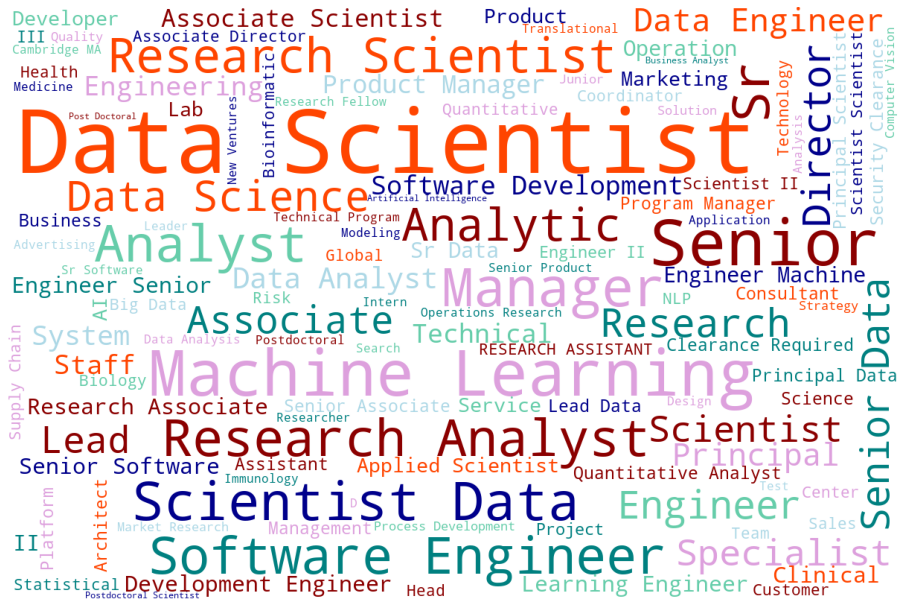

In [63]:
color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (16,12)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(data['position']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()